In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

### Decision Trees: практика
### Corporación Favorita Grocery Sales Forecasting

<div>
<img src="picture.png" width="1000"/>
</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

In [4]:
### Что нужно предсказывать?

train = pd.read_csv('train_cut.csv', index_col=0)

print(f"DataFrame shape is {train.shape}")

train.head()

DataFrame shape is (6274852, 5)


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
79,2013-01-01,25,257847,90.000,NaN
480,2013-01-01,25,953609,1.000,NaN
313,2013-01-01,25,671706,2.548,NaN
497,2013-01-01,25,999545,1.000,NaN
440,2013-01-01,25,890372,1.000,NaN


In [5]:
### Описание магазинов

stores = pd.read_csv('stores.csv')

print(f"DataFrame shape is {stores.shape}")

stores.head()

DataFrame shape is (54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
### Описание продуктов

items = pd.read_csv('items.csv')

print(f"DataFrame shape is {items.shape}")

items.head()

DataFrame shape is (4100, 4)


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [7]:
### Котировки нефти

oil = pd.read_csv('oil.csv')

print(f"DataFrame shape is {oil.shape}")

oil.head()

DataFrame shape is (1218, 2)


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
### Праздничные дни

holidays_events = pd.read_csv('holidays_events.csv')

print(f"DataFrame shape is {holidays_events.shape}")

holidays_events.head()

DataFrame shape is (350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


### EDA

In [9]:
train['month'] = train.date.apply(lambda x: str(x)[:7])

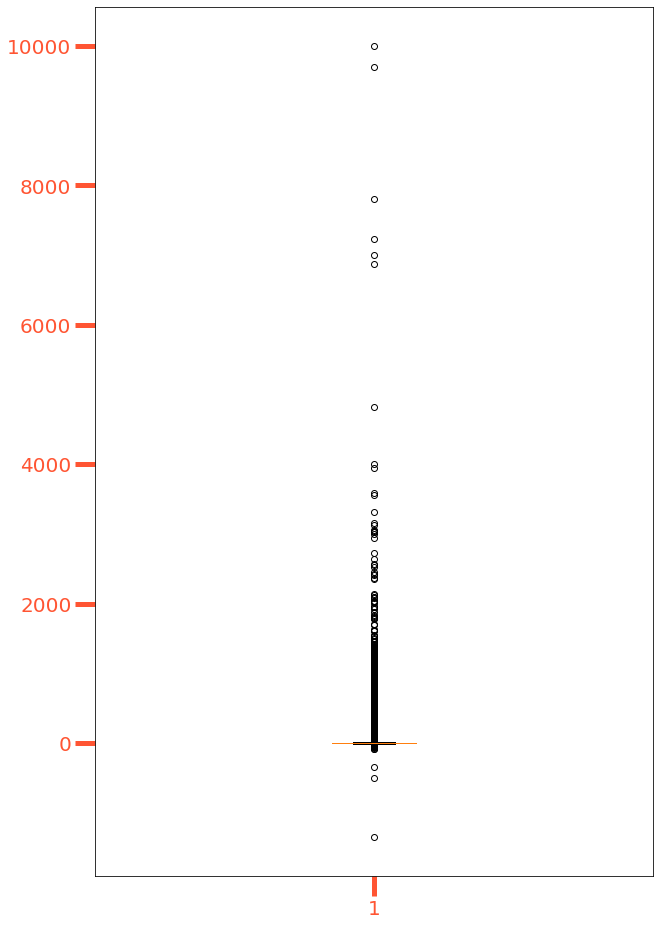

In [10]:
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(train['unit_sales'].values)

plt.show()

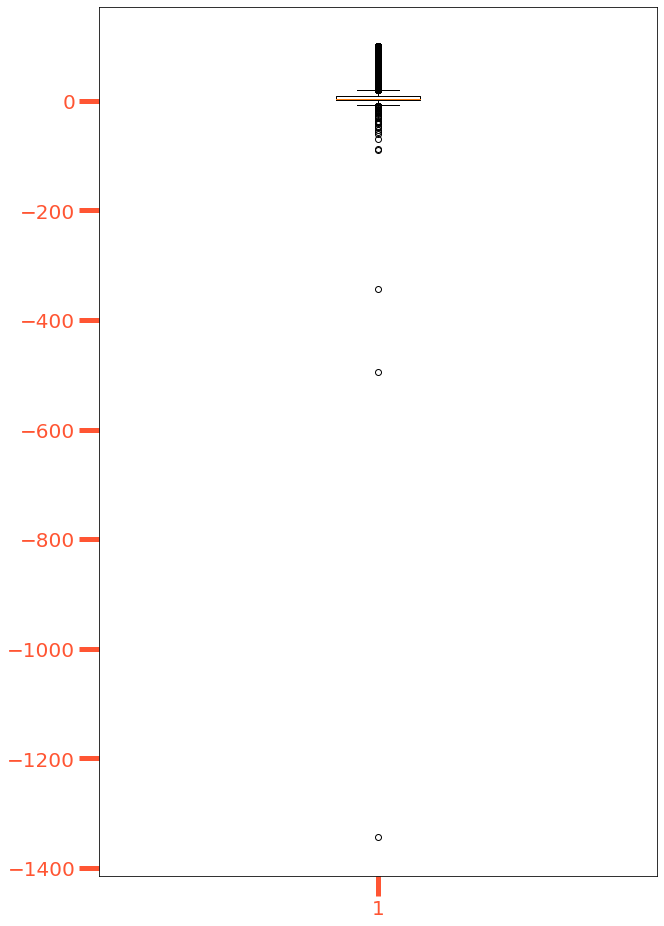

In [11]:
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(train[train.unit_sales<=100]['unit_sales'].values)

plt.show()

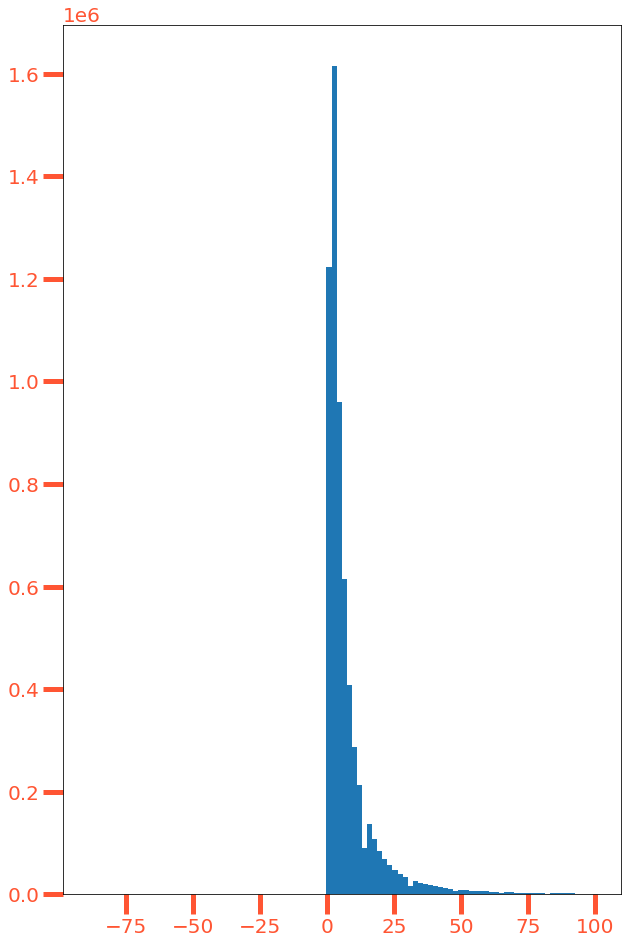

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.hist(train[abs(train.unit_sales)<=100]['unit_sales'].values, bins=100)

plt.show()

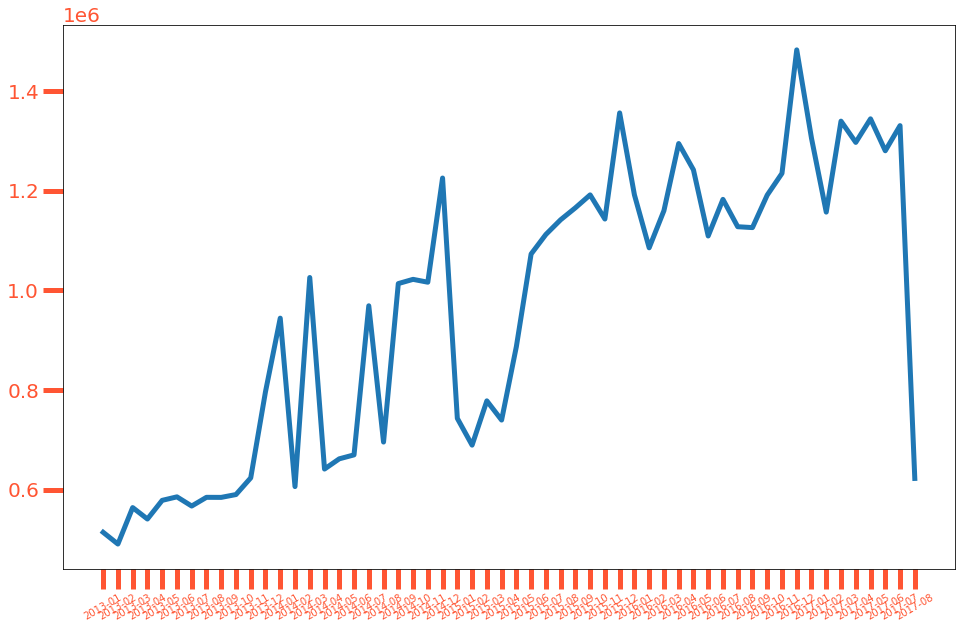

In [13]:
### Количество наблюдений по датам

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(train.groupby('month')['unit_sales'].sum())

plt.xticks(rotation=30, size=10)

plt.show()

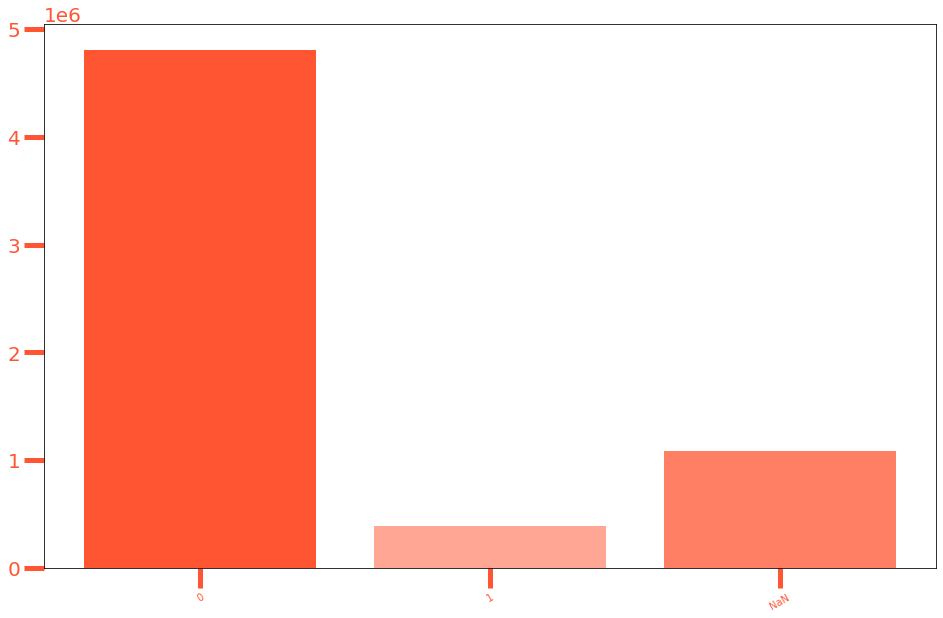

In [14]:
### Распределение onpromotion фичи

def replace_onpromotion(x):
    if x == False:
        return 0
    elif x == True:
        return 1
    else:
        return x
    
train['onpromotion'] = train['onpromotion'].fillna("NaN")
train['onpromotion'] = train['onpromotion'].apply(replace_onpromotion).apply(str)

fig = plt.figure()
fig.set_size_inches(16, 10)


for_hist = train.groupby('onpromotion').size()
plt.bar(for_hist.index, for_hist.values, color=['#FF5533', '#FFA695', '#FF7F65'])

plt.xticks(rotation=30, size=10)

plt.show()

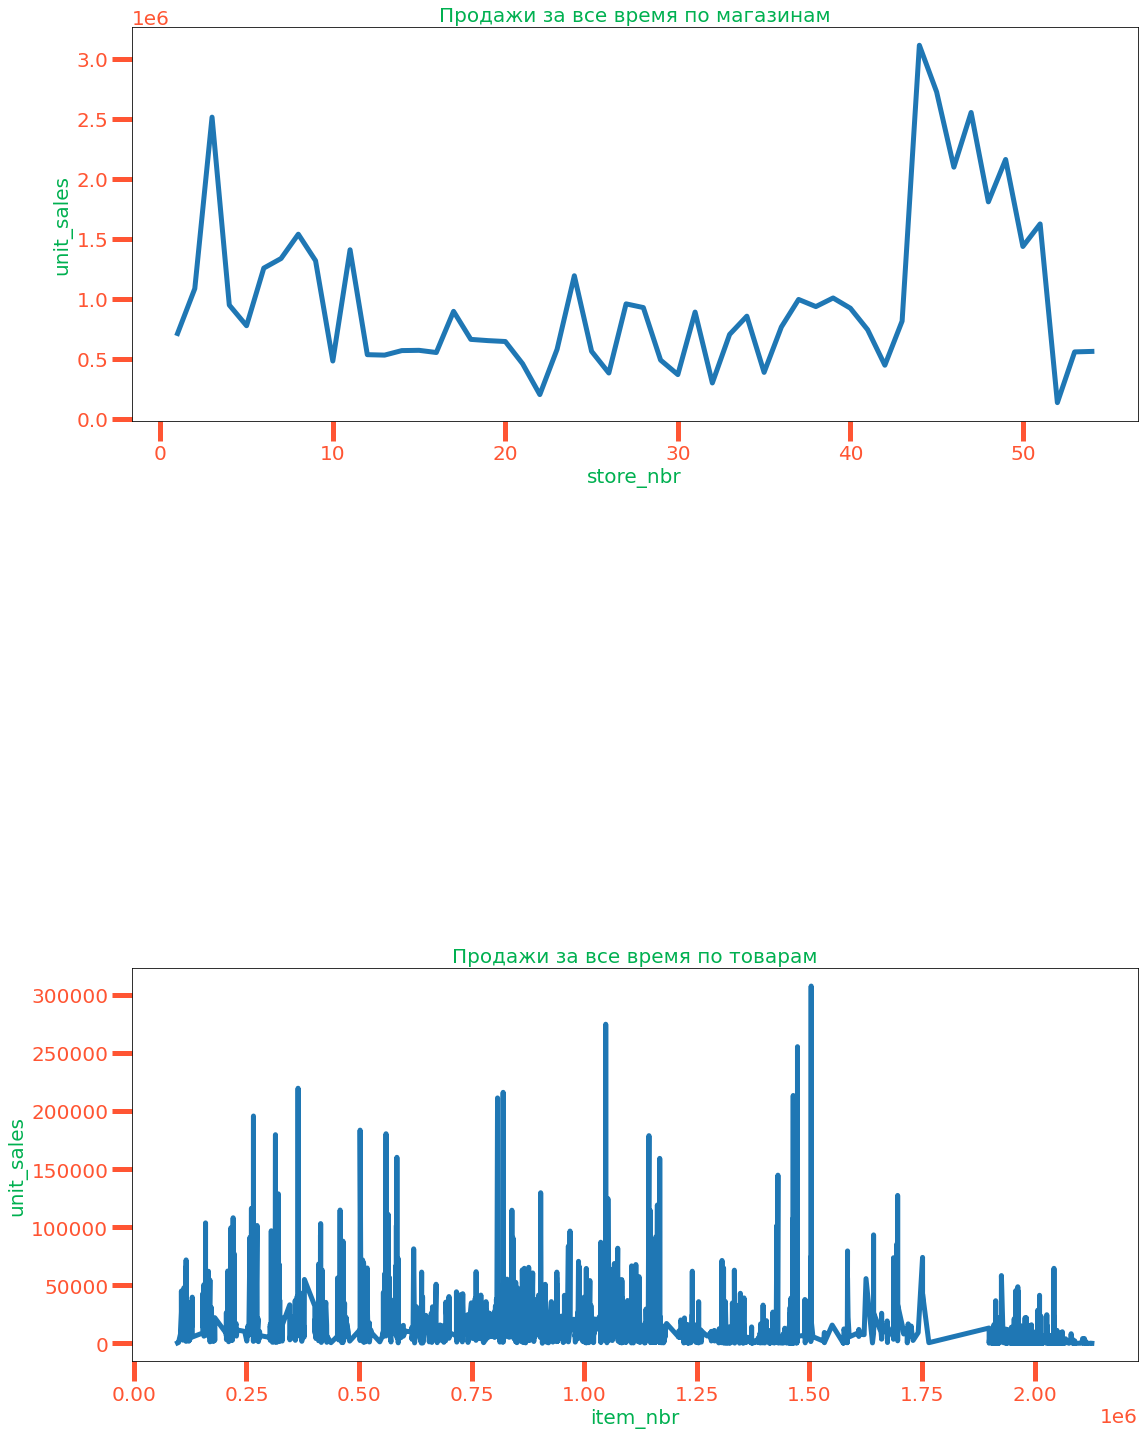

In [15]:
### Распределение магазинов и товаров

fig = plt.figure()
fig.set_size_inches(16, 20)

ax_1 = fig.add_subplot(3, 1, 1)
sns.lineplot(data=train.groupby(by='store_nbr',
                           as_index=False)['unit_sales'].sum().sort_values(by='unit_sales'),
             x='store_nbr',
             y='unit_sales')


ax_2 = fig.add_subplot(3, 1, 3)
sns.lineplot(data=train.groupby(by='item_nbr',
                           as_index=False)['unit_sales'].sum().sort_values(by='unit_sales'),
             x='item_nbr',
             y='unit_sales')




fig.tight_layout()

ax_1.set(title = 'Продажи за все время по магазинам')
ax_2.set(title = 'Продажи за все время по товарам')

plt.show()

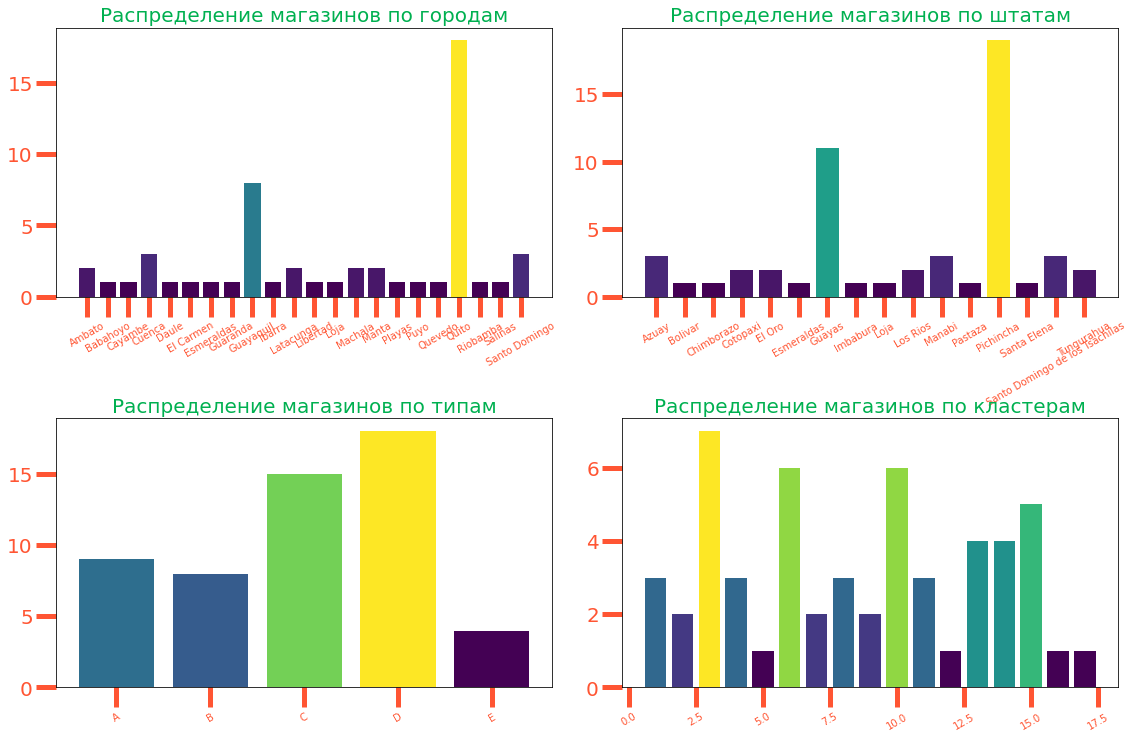

In [16]:
### Распределение магазинов по городам/штатам/типам/кластерам

fig = plt.figure()
fig.set_size_inches(16, 10)


### по городам
ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = stores.groupby('city').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по штатам
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = stores.groupby('state').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по типу
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = stores.groupby('type').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по кластеру
ax_4 = fig.add_subplot(2, 2, 4)

for_hist = stores.groupby('cluster').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

fig.tight_layout()

ax_1.set(title = 'Распределение магазинов по городам')
ax_2.set(title = 'Распределение магазинов по штатам')
ax_3.set(title = 'Распределение магазинов по типам')
ax_4.set(title = 'Распределение магазинов по кластерам')

plt.show()

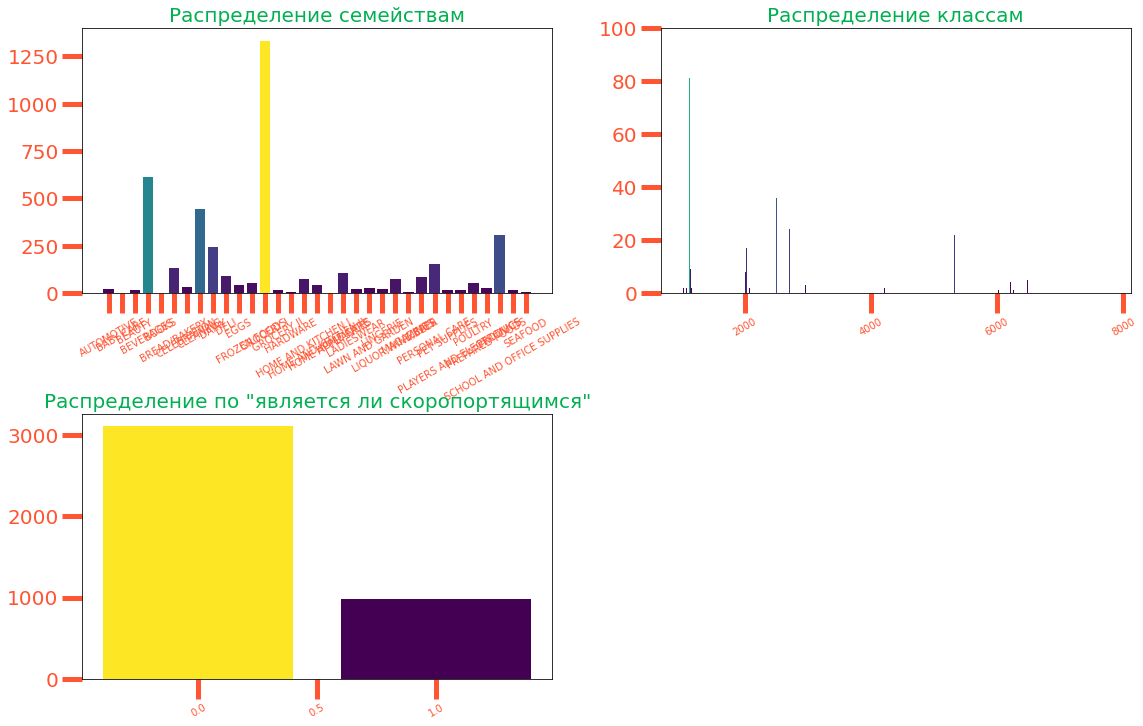

In [17]:
### Распределения продуктов

fig = plt.figure()
fig.set_size_inches(16, 10)


### по семействам
ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = items.groupby('family').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по классам
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = items.groupby('class').size().sort_values()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

plt.ylim((0, 100))

### по "является ли скоропортящимся"
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = items.groupby('perishable').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)


fig.tight_layout()

ax_1.set(title = 'Распределение семействам')
ax_2.set(title = 'Распределение классам')
ax_3.set(title = 'Распределение по "является ли скоропортящимся"')

plt.show()

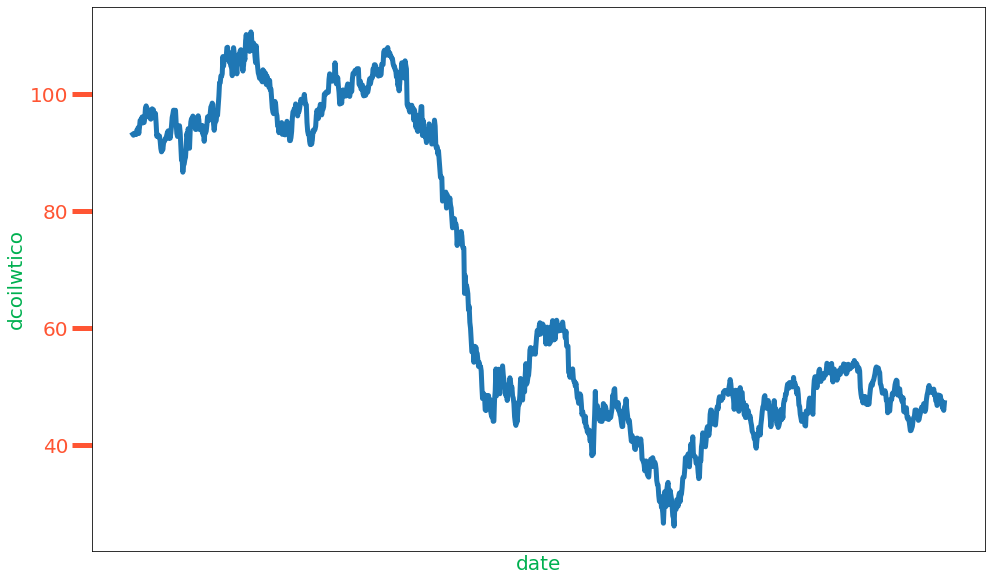

In [18]:
### Котировки нефти

fig = plt.figure()
fig.set_size_inches(16, 10)

oil = oil.fillna(method='ffill')

sns.lineplot(data=oil,
             x='date',
             y='dcoilwtico')


plt.xticks([])

plt.show()

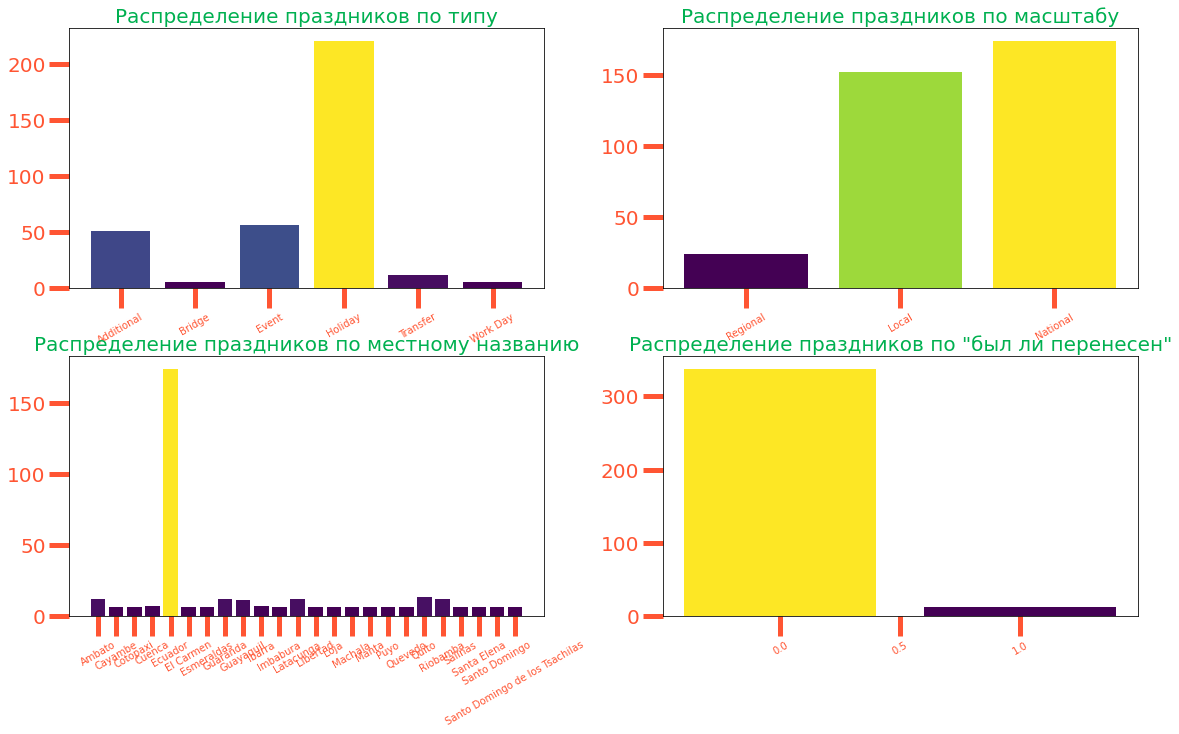

In [19]:
### Распределения выходных и праздников

fig = plt.figure()
fig.set_size_inches(16, 10)


### по типу
ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = holidays_events.groupby('type').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по масштабу
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = holidays_events.groupby('locale').size().sort_values()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по местному названию
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = holidays_events.groupby('locale_name').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по "был ли перенесен"
ax_4 = fig.add_subplot(2, 2, 4)

for_hist = holidays_events.groupby('transferred').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

fig.tight_layout()

ax_1.set(title = 'Распределение праздников по типу')
ax_2.set(title = 'Распределение праздников по масштабу')
ax_3.set(title = 'Распределение праздников по местному названию')
ax_4.set(title = 'Распределение праздников по "был ли перенесен"')

plt.show()

In [20]:
### Соединим всю информацию в один датасет

train.shape

(6274852, 6)

In [21]:
### Присоединим котировки нефти по дате

df = pd.merge(train,
              oil,
              on='date',
              how='left')

### Заполним пропуски

min_date_price = df[~df['dcoilwtico'].isna()].iloc[0][-1]

df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill')
df['dcoilwtico'] = df['dcoilwtico'].fillna(min_date_price)

df.shape

(6274852, 7)

In [22]:
### Присоединим информацию по магазинам

df_2 = pd.merge(df,
              stores,
              on='store_nbr',
              how='left')

print(f"Размер датасета: {df_2.shape}")

df_2.isna().sum()

Размер датасета: (6274852, 11)


date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
month          0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
dtype: int64

In [23]:
### Присоединим информацию по товарам

df_3 = pd.merge(df_2,
                items,
                on='item_nbr',
                how='left')

print(f"Размер датасета: {df_3.shape}")

df_3.isna().sum()

Размер датасета: (6274852, 14)


date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
month          0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
family         0
class          0
perishable     0
dtype: int64

In [24]:
### Присоединим информацию по праздничным дням

df_4 = pd.merge(df_3,
                holidays_events.rename({"type":"holiday_type"}, axis=1),
                on='date',
                how='left')

print(f"Размер датасета: {df_4.shape}")

df_4.isna().sum()

Размер датасета: (6397785, 19)


date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion           0
month                 0
dcoilwtico            0
city                  0
state                 0
type                  0
cluster               0
family                0
class                 0
perishable            0
holiday_type    5306754
locale          5306754
locale_name     5306754
description     5306754
transferred     5306754
dtype: int64

In [25]:
### Заполним пропуски инфой, что это был рабочий день

df_4["holiday_type"] = df_4["holiday_type"].fillna("WorkingDay")
df_4["locale"] = df_4["locale"].fillna("WorkingDay")
df_4["locale_name"] = df_4["locale_name"].fillna("WorkingDay")
df_4["description"] = df_4["description"].fillna("WorkingDay")
df_4["transferred"] = df_4["holiday_type"].fillna(False)

df_4.isna().sum()

date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
month           0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
family          0
class           0
perishable      0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

In [26]:
df_4.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,2013-01-01,25,257847,90.000,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,BEVERAGES,1120,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
1,2013-01-01,25,953609,1.000,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,CLEANING,3046,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
2,2013-01-01,25,671706,2.548,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,DELI,2664,1,Holiday,National,Ecuador,Primer dia del ano,Holiday
3,2013-01-01,25,999545,1.000,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,CLEANING,3026,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
4,2013-01-01,25,890372,1.000,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,GROCERY I,1002,0,Holiday,National,Ecuador,Primer dia del ano,Holiday


Сгенерим трансформер для обработки признаков!

In [28]:
### Возвраты товаров - это скорее выбросы

df_4 = df_4[df_4['unit_sales'] > 0]

In [29]:
X = df_4.drop("unit_sales", axis=1)
y = df_4["unit_sales"]

In [30]:
### Будем считать MSLE

y = y.apply(np.log1p)

In [31]:
### Отделим валидацию от теста по времени!

X_test, X_train = X[X.date >= '2017-06-01'], X[X.date < '2017-06-01']

y_test, y_train = y[y.index.isin(X_test.index)], y[y.index.isin(X_train.index)]

In [32]:
### Уберем колонку с датой

X_test = X_test.drop('date', axis=1)
X_train = X_train.drop('date', axis=1)
X = X.drop('date', axis=1)

In [33]:
object_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'month',
               'city', 'state', 'type', 'cluster', 'family',
               'class', 'perishable', 'holiday_type', 'locale',
               'locale_name', 'description', 'transferred']

X.head()

,store_nbr,item_nbr,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,25,257847,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,BEVERAGES,1120,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
1,25,953609,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,CLEANING,3046,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
2,25,671706,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,DELI,2664,1,Holiday,National,Ecuador,Primer dia del ano,Holiday
3,25,999545,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,CLEANING,3026,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
4,25,890372,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,GROCERY I,1002,0,Holiday,National,Ecuador,Primer dia del ano,Holiday


In [34]:
X[object_cols] = X[object_cols].astype(object)
X_test[object_cols] = X_test[object_cols].astype(object)
X_train[object_cols] = X_train[object_cols].astype(object)

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self,
                 object_columns=[],
                 target_name='unit_sales'):
        
        self.object_columns = object_columns
        self.target_name = target_name
        
                
    def fit(self,
            X,
            y):
        
        X_fit = X.copy()
        y_fit = y.copy()
        
        self.numeric_columns = [x for x in X_fit.columns if x not in self.object_columns]
        
        X_with_target = pd.concat((X_fit, y_fit), axis=1)
        
        ### Сгенерим колонки к которым применим One-Hot-Encoding
        self.cols_for_ohe = [col for col in self.object_columns
                             if 
                             X_with_target[col].nunique() <= 10]
        
        ### Запомним все ohe колонки и их названия!
        self.ohe_names = {col : sorted([f"{col}_{value}" for value in X_with_target[col].unique()])
                          for col in self.cols_for_ohe}
        
        
        ### Сгенерим колонки к которым применим Mean-Target-Encoding
        self.cols_for_mte = [col for col in self.object_columns
                             if X_with_target[col].nunique() > 10]
        
        ### Посчитаем на валидации средние значения таргета
        self.dict_of_means = {col : X_with_target.groupby(col)[self.target_name].mean()
                              for col in self.cols_for_mte}
        
        
        return self
    
    def transform(self,
                  X,
                  y=None):
        
        X_ = X.copy()
        
        
        data_part = pd.get_dummies(X_[self.cols_for_ohe],
                                   prefix=self.cols_for_ohe)
        
        data_part_cols = data_part.columns
        
        X_ = X_.drop(self.cols_for_ohe, axis=1)
        X_ = pd.concat((X_, data_part), axis=1)
        
    
        for col in self.cols_for_mte:
                X_[col] = X_[col].map(self.dict_of_means[col])
                
                mean_value = self.dict_of_means[col].values.mean()
                
                X_[col] = X_[col].fillna(mean_value)
                
            
            
        all_ohe = list(itertools.chain(*list(self.ohe_names.values())))
        
        missing_columns = [x 
                           for x in all_ohe
                           if x not in X_.columns
                           and
                           x not in self.numeric_columns]

        extra_columns = [x
                         for x in data_part_cols
                         if x not in all_ohe]
        
        ### Новые категории необходимо убрать
        X_ = X_.drop(extra_columns, axis=1)
    
        ### Отсутствующие категории (бинарные колонки)
        ### необходимо добавить: заполним их просто нулями
        
        if len(missing_columns) != 0:

            zeros = np.zeros((X_.shape[0], len(missing_columns)))
            zeros = pd.DataFrame(zeros,
                                 columns=missing_columns,
                                 index=X_.index)

            X_ = pd.concat((X_, zeros), axis=1)
            
        return X_[sorted(X_.columns)]

In [49]:
### Проверка!

transformer = CustomFunctionTransformer(object_columns=object_cols)

transformer.fit(X_train, y_train)

CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                          'onpromotion', 'month', 'city',
                                          'state', 'type', 'cluster', 'family',
                                          'class', 'perishable', 'holiday_type',
                                          'locale', 'locale_name',
                                          'description', 'transferred'])

In [50]:
check_train = transformer.transform(X_train)
check_test = transformer.transform(X_test)

In [51]:
check_test

,city,class,cluster,dcoilwtico,description,family,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer,holiday_type_Work Day,holiday_type_WorkingDay,item_nbr,locale_Local,locale_National,locale_Regional,locale_WorkingDay,locale_name,month,onpromotion_0,onpromotion_1,onpromotion_NaN,perishable_0,perishable_1,state,store_nbr,transferred_Additional,transferred_Bridge,transferred_Event,transferred_Holiday,transferred_Transfer,transferred_Work Day,transferred_WorkingDay,type_A,type_B,type_C,type_D,type_E
5980893,1.929557,1.893738,1.755433,48.32,1.750490,1.761502,0,0.0,0.0,0,0,0.0,1,1.718818,0,0,0,1,1.750490,1.764847,1,0,0.0,0,1,1.927277,1.697383,0,0.0,0.0,0,0,0.0,1,0,1,0,0,0
5980894,1.607719,1.518565,1.551288,48.32,1.750490,1.950299,0,0.0,0.0,0,0,0.0,1,1.342395,0,0,0,1,1.750490,1.764847,1,0,0.0,1,0,1.607719,1.607719,0,0.0,0.0,0,0,0.0,1,0,0,1,0,0
5980895,1.929557,1.564698,1.966649,48.32,1.750490,1.761502,0,0.0,0.0,0,0,0.0,1,1.291363,0,0,0,1,1.750490,1.764847,1,0,0.0,0,1,1.927277,1.874880,0,0.0,0.0,0,0,0.0,1,0,0,0,1,0
5980896,1.374465,2.070567,1.526522,48.32,1.750490,2.276875,0,0.0,0.0,0,0,0.0,1,1.711078,0,0,0,1,1.750490,1.764847,1,0,0.0,0,1,1.374465,1.374465,0,0.0,0.0,0,0,0.0,1,0,0,1,0,0
5980897,1.929557,1.625461,1.658640,48.32,1.750490,1.710138,0,0.0,0.0,0,0,0.0,1,1.718399,0,0,0,1,1.750490,1.764847,1,0,0.0,1,0,1.927277,1.519988,0,0.0,0.0,0,0,0.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397780,1.929557,1.569078,2.044380,47.57,1.749309,1.710138,0,0.0,0.0,1,0,0.0,0,1.363200,1,0,0,0,1.745983,1.764847,0,1,0.0,1,0,1.927277,2.073149,0,0.0,0.0,1,0,0.0,0,1,0,0,0,0
6397781,1.929557,1.508487,2.172999,47.57,1.749309,1.710138,0,0.0,0.0,1,0,0.0,0,1.994845,1,0,0,0,1.745983,1.764847,1,0,0.0,1,0,1.927277,2.265844,0,0.0,0.0,1,0,0.0,0,1,0,0,0,0
6397782,1.929557,0.992645,1.755433,47.57,1.749309,1.007815,0,0.0,0.0,1,0,0.0,0,1.115511,1,0,0,0,1.745983,1.764847,1,0,0.0,1,0,1.927277,1.697383,0,0.0,0.0,1,0,0.0,0,0,1,0,0,0
6397783,1.661150,1.740134,1.643954,47.57,1.749309,1.575496,0,0.0,0.0,1,0,0.0,0,1.528227,1,0,0,0,1.745983,1.764847,1,0,0.0,1,0,1.661150,1.561470,0,0.0,0.0,1,0,0.0,0,0,0,0,1,0


Обучим модельку!

Как модель валидировать?

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

pipe = Pipeline([("custom_transformer",
                  CustomFunctionTransformer(object_columns=object_cols,
                                            target_name='unit_sales')),
                  
                  
                 ("decision_tree", 
                  DecisionTreeRegressor())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(object_columns=['store_nbr',
                                                           'item_nbr',
                                                           'onpromotion',
                                                           'month', 'city',
                                                           'state', 'type',
                                                           'cluster', 'family',
                                                           'class',
                                                           'perishable',
                                                           'holiday_type',
                                                           'locale',
                                                           'locale_name',
                                                           'description',
                                                           'transferred'])),
  

In [53]:
### Замерим качество работы такой модели
### Возьмем MSLE

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

Качество на трейне: 0.004
Качество на тесте: 0.688


In [54]:
pipe.get_params()

{'memory': None,
 'steps': [('custom_transformer',
   CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                             'onpromotion', 'month', 'city',
                                             'state', 'type', 'cluster', 'family',
                                             'class', 'perishable', 'holiday_type',
                                             'locale', 'locale_name',
                                             'description', 'transferred'])),
  ('decision_tree', DecisionTreeRegressor())],
 'verbose': False,
 'custom_transformer': CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                           'onpromotion', 'month', 'city',
                                           'state', 'type', 'cluster', 'family',
                                           'class', 'perishable', 'holiday_type',
                                           'locale', 'locale_name',
                         

In [55]:
### Попробуем контролировать обобщающую способность такой модели!

from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=3)

from sklearn.model_selection import GridSearchCV

param_grid = {
    "decision_tree__max_depth": [3, 5, 10],
    "decision_tree__min_samples_split": [10, 200, 50000],
    "decision_tree__min_impurity_decrease": [0, 0.1],
    "decision_tree__max_leaf_nodes": [100, 1000]
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, 
                      param_grid, 
                      cv=splitter,
                      scoring='neg_mean_squared_error',
                      verbose=10)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test, y_test)}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 1/3; 1/36] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-0.522 total time=  13.7s
[CV 2/3; 1/36] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 2/3; 1/36] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-0.508 total time=  24.2s
[CV 3/3; 1/36] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 3/3; 1/36] END decision_tree__max_depth=3, decision_tree__max_leaf_nod

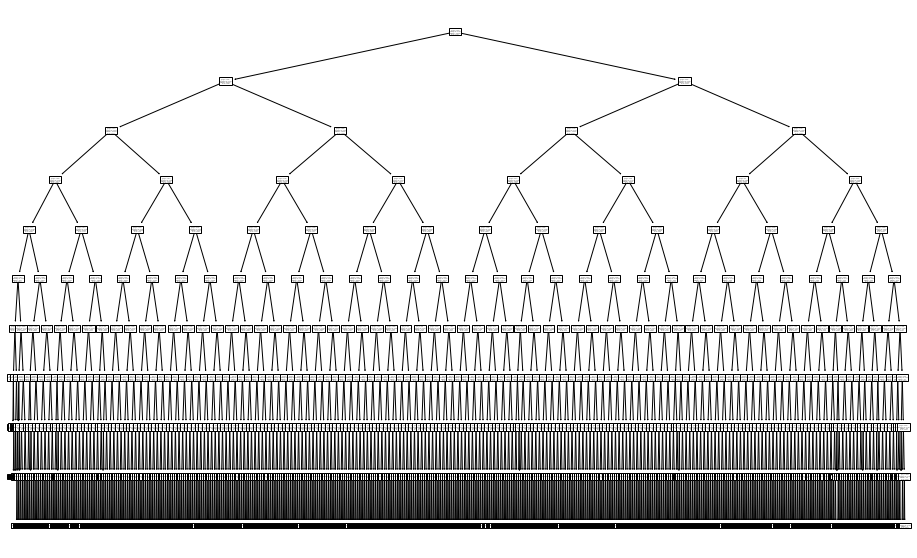

In [66]:
### Изобразим дерево в виде графа!

from sklearn import tree


fig = plt.figure()
fig.set_size_inches(16, 10) 

tree.plot_tree(search.best_estimator_['decision_tree'])

plt.show()

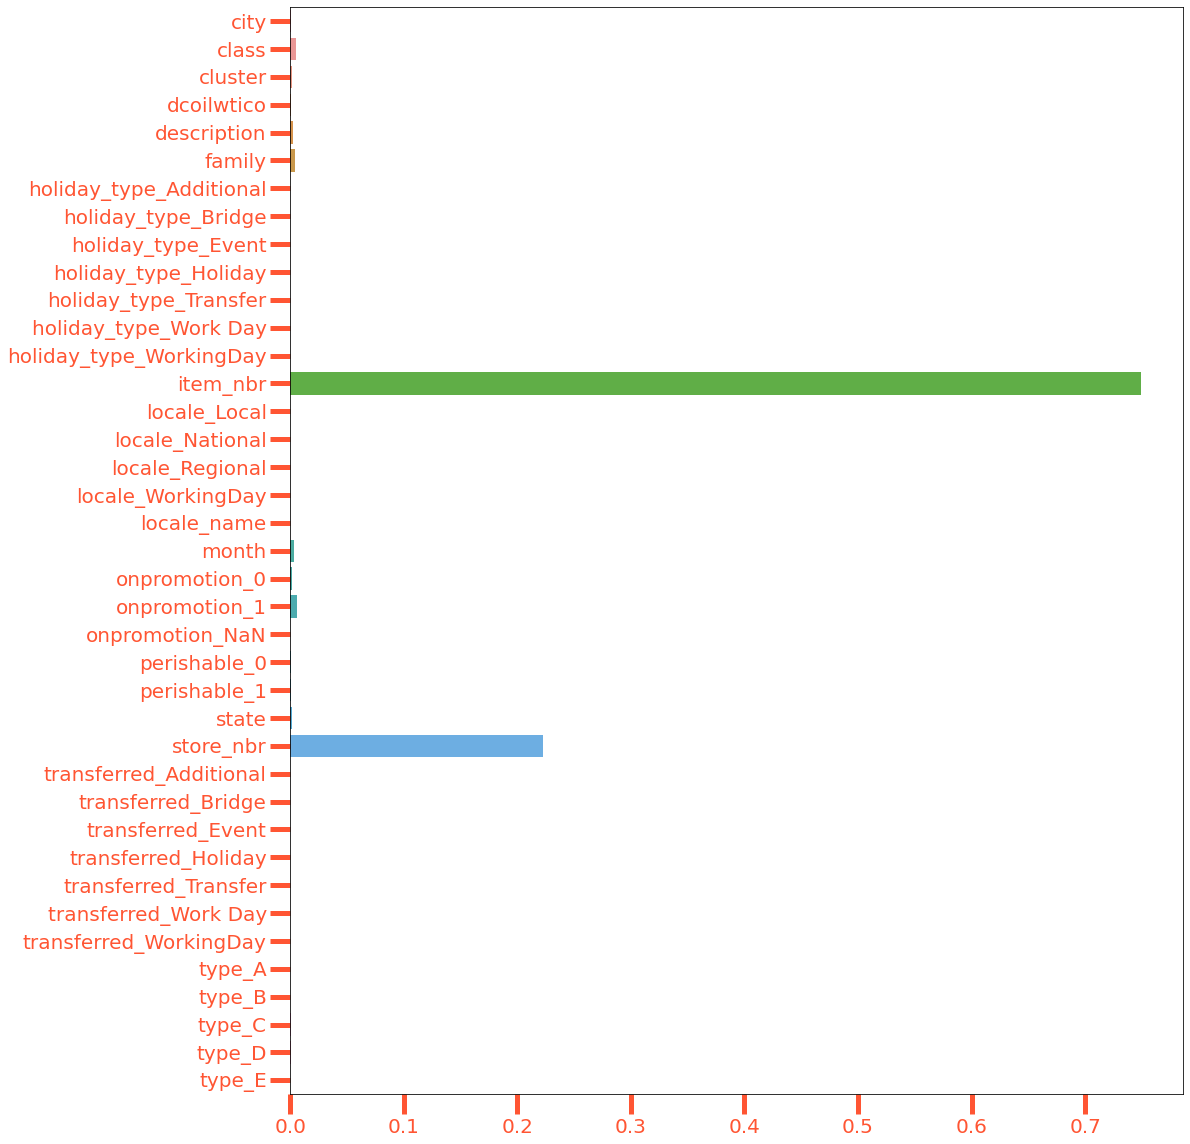

In [73]:

fig = plt.figure()
fig.set_size_inches(16, 20)

sns.barplot(x=search.best_estimator_['decision_tree'].feature_importances_,
            y=check_test.columns)


plt.show()